In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'weather-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1715246%2F2854929%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240329%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240329T120040Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5a484f70b142617ca23ae2826b591ac95105c9ca1b35408329b05f6c9380a0c8c026fcbfcf9e4f4ca145590c4a092f7dd902dd044fadc9abd17c5dec26b6ce605347574f4abe33481431f5f48449c522123239b30118746cb282874d0b77554880d9619fc8204bee0cccfbbd1e40ed2b5ba2c6431e55544b06daca799232b839c485811e31391a810c266b3d8b9496a7d15245564fcfa3c65fe71035421c7bb1025514d65f629508a2a8520e428d6bfeaa5392a270050f54b20db64faa92beb16d3a4bc7e07bcfc270b5c58b99944b2b1b7ace8a0190cf48f5bc5218b08b56d01a26acf2d59bf6c4cb939842d17c83a926ea7c770fb27cc230125be93d4b49a1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 615102810 bytes downloaded
Downloaded and uncompressed: weather-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/weather-dataset/dataset/fogsmog/4413.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4851.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4454.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4182.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4649.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4167.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4322.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4701.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4113.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4575.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4162.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4655.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4647.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4536.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4415.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4499.jpg
/kaggle/input/weather-dataset/dataset/fogsmog/4693.jpg
/kaggle/input/

In [3]:
!pip install torchutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.6 MB/s eta 0:00:00


In [4]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu
import json
import matplotlib.pyplot as plt
import torchvision

In [5]:
device = 'cpu'

In [6]:
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

**1. Splitting dataset for training and validation**

In [30]:
train_dataset = torchvision.datasets.ImageFolder('/kaggle/input/weather-dataset/dataset/', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class_names = train_dataset.classes


In [29]:
for images, labels in train_loader:
    plt.figure(figsize=(15, 25))
    batch_size = images.size(0)
    for i in range(batch_size):
        plt.subplot(7, 5, i+1)
        plt.axis('off')
        plt.imshow(images[i].permute(1, 2, 0))
        plt.title(class_names[labels[i].item()])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7abe89a39000> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7abe89a38280> (for post_execute):


KeyboardInterrupt: 

In [13]:
class_names

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

In [14]:
train_size = int(0.8 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_data, valid_data = torch.utils.data.random_split(train_dataset, [train_size, valid_size])

In [15]:
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=True)

**2. Loading with pretraind model. Freezing parametrs, determining the loss function and ond optimizer**

In [16]:
# Загрузка предобученной модели ResNet18
model = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 96.6MB/s]


In [17]:
# Замена последнего слоя
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 11) # 11 классов для классификации

In [18]:
# Замораживание параметров
for param in model.parameters():
    param.requires_grad = False
model.fc.weight.requires_grad = True
model.fc.bias.requires_grad = True

In [19]:
# Перемещение модели на устройство
model = model.to(device)

# Определение функции ошибки и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**3. Let's do mini deep learning!**

In [21]:
# Обучение модели
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Оценка точности модели на валидационном наборе данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}')

Epoch 1/1, Loss: 1.0414, Accuracy: 0.85


In [22]:
torch.save(model.state_dict(), 'weather_classification_resnet18.pth')

Dataset Composition:
dew: 698
fogsmog: 851
frost: 475
glaze: 639
hail: 591
lightning: 377
rain: 526
rainbow: 232
rime: 1160
sandstorm: 692
snow: 621
Weighted F1 Score: 0.8467022663273518


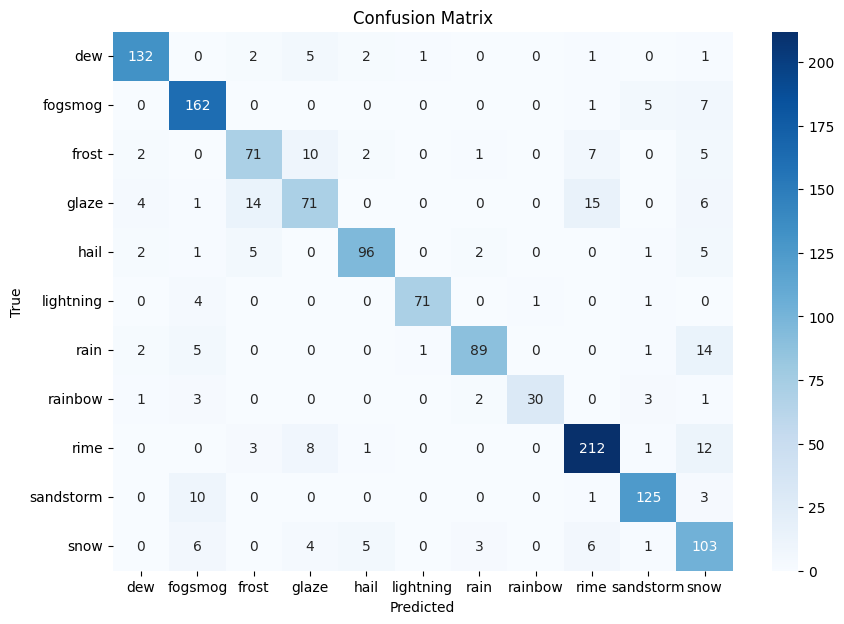

In [26]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Состав датасета
class_distribution = train_dataset.targets
class_counts = {class_names[i]: class_distribution.count(i) for i in range(len(class_names))}
print('Dataset Composition:')
for key, value in class_counts.items():
    print(f'{key}: {value}')

# Значение метрики f1 и confusion matrix
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

f1 = f1_score(true_labels, predictions, average='weighted')
print(f'Weighted F1 Score: {f1}')

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


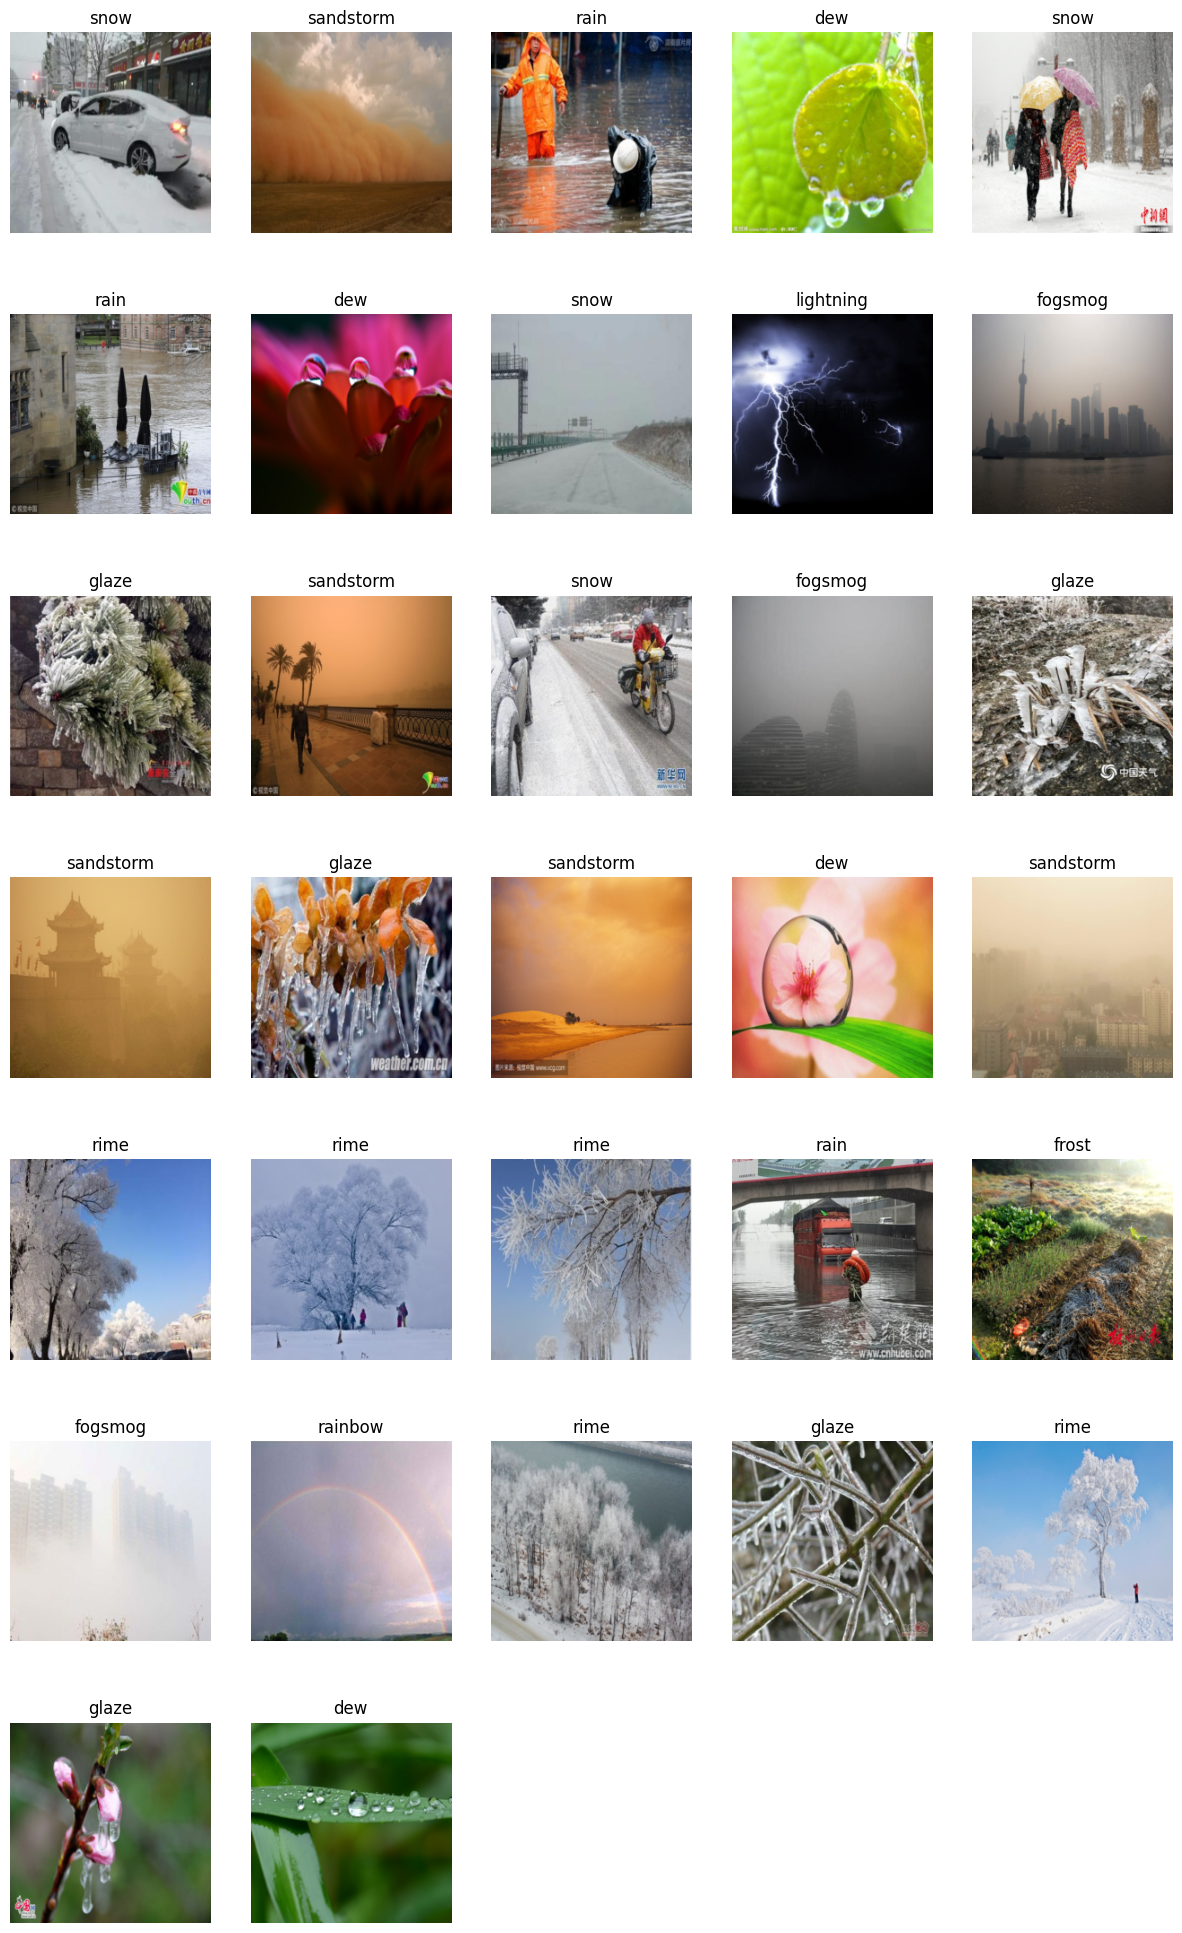

In [34]:
# Получение случайного батча из обучающего набора
for images, labels in train_loader:
    # Вывод изображений и их меток
    plt.figure(figsize=(15, 25))
    for i in range(len(images)):
        plt.subplot(7, 5, i+1)
        plt.axis('off')
        image = images[i].permute(1, 2, 0).numpy()  # Перевод тензора в изображение
        plt.imshow(image)
        plt.title(class_names[labels[i].item()])
    plt.show()
    break  # Stop after one batch

